In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
saldata = pd.read_csv('csv files/Salary_Data.csv')
saldata

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,NaN,56642
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [3]:
x = saldata.iloc[:,:-1].values
y = saldata.iloc[:,1].values

In [4]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [5]:
imputer=imputer.fit(x)  

In [6]:
x= imputer.transform(x)
print(x)

[[ 1.1       ]
 [ 1.3       ]
 [ 1.5       ]
 [ 5.42758621]
 [ 2.2       ]
 [ 2.9       ]
 [ 3.        ]
 [ 3.2       ]
 [ 3.2       ]
 [ 3.7       ]
 [ 3.9       ]
 [ 4.        ]
 [ 4.        ]
 [ 4.1       ]
 [ 4.5       ]
 [ 4.9       ]
 [ 5.1       ]
 [ 5.3       ]
 [ 5.9       ]
 [ 6.        ]
 [ 6.8       ]
 [ 7.1       ]
 [ 7.9       ]
 [ 8.2       ]
 [ 8.7       ]
 [ 9.        ]
 [ 9.5       ]
 [ 9.6       ]
 [10.3       ]
 [10.5       ]]


In [7]:
print(np.around(x, decimals=1))
print(x)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 5.4]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[[ 1.1       ]
 [ 1.3       ]
 [ 1.5       ]
 [ 5.42758621]
 [ 2.2       ]
 [ 2.9       ]
 [ 3.        ]
 [ 3.2       ]
 [ 3.2       ]
 [ 3.7       ]
 [ 3.9       ]
 [ 4.        ]
 [ 4.        ]
 [ 4.1       ]
 [ 4.5       ]
 [ 4.9       ]
 [ 5.1       ]
 [ 5.3       ]
 [ 5.9       ]
 [ 6.        ]
 [ 6.8       ]
 [ 7.1       ]
 [ 7.9       ]
 [ 8.2       ]
 [ 8.7       ]
 [ 9.        ]
 [ 9.5       ]
 [ 9.6       ]
 [10.3       ]
 [10.5       ]]


In [8]:
from sklearn.model_selection import train_test_split  
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=1/3,random_state=0)

In [9]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression() 
lr.fit(xtrain,ytrain)
pred=lr.predict(xtest) 
print("predicted ytest data",pred) 
print("given ytest value",ytest)

predicted ytest data [ 40361.99005022 121383.22949856  64300.08352359  62458.69171795
 114017.66227599 106652.09505341 114938.35817881  63379.38762077
  75348.43435746  99286.52783083]
given ytest value [ 37731 122391  57081  63218 116969 109431 112635  55794  83088 101302]


In [10]:
#mean squared error " it is mean of squered difference between actual and pridected value"
sum=0
diff=(ytest-pred)**2
for item in diff:
    sum=sum+item
error=sum/len(ytest) 
print("error",error)

error 20386870.173618395


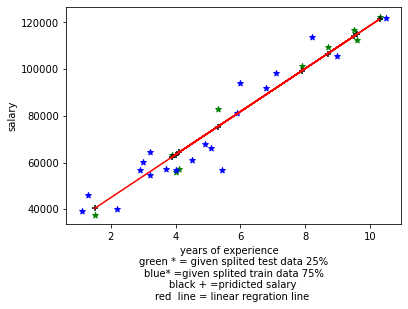

In [11]:
plt.scatter(xtest,ytest,color="green",marker="*")
plt.scatter(xtrain,ytrain,color="blue",marker="*")
plt.scatter(xtest,lr.predict(xtest),color="black",marker="+") 
plt.plot(xtest,lr.predict(xtest),color="red")
plt.xlabel('''years of experience   
green * = given splited test data 25%
blue* =given splited train data 75%
black + =pridicted salary 
red  line = linear regration line ''') 
plt.ylabel("salary")
plt.show() 